In [35]:
import os
import cobra
from cobra.io import read_sbml_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def import_models(file_path, extension='.xml'):
    files = [file for file in os.listdir(file_path) if file.endswith(extension)]
    models={}
    for x in files:
        split_name = x.split('.')
        file_name = split_name[0]
        models[file_name] = file_path + x
        
    return models

In [36]:
file_path = 'C:/Users/User/Documents/GitHub/10 AGORA models/'
models = import_models(file_path)

In [7]:
def FBA_solver(models, reaction = 'EX_glc_D(e)'):
    model_results = [[] for i in range (10)]
    x = 0
    for y in models.keys():
        model = read_sbml_model(models[y])
        solution = model.optimize()
        while x < 10:
            model_results[x].append(y)
            model_results[x].append(solution.objective_value)
            model_results[x].append(solution.fluxes[reaction])
            break
        x += 1
        
    df = pd.DataFrame(model_results, columns=['Model Name', 'Growth', 'Glucose Flux'], index=['1','2','3','4','5','6','7','8','9','10'])
    return df

FBA_solver(models)

,Model Name,Growth,Glucose Flux
1,Abiotrophia_defectiva_ATCC_49176,65.662169,0.000000
2,Actinomyces_georgiae_DSM_6843,50.144125,0.000000
3,Bacillus_altitudinis_41KF2b,72.901606,0.000000
4,Bifidobacterium_thermacidophilum_subsp_thermac...,79.944926,0.000000
5,Bradyrhizobium_japonicum_USDA_6,83.867455,0.000000
6,Clostridium_botulinum_F_str_230613,83.714319,0.000000
7,Hafnia_alvei_BIDMC_31,159.051383,0.000000
8,Klebsiella_oxytoca_KCTC_1686,157.596633,-19.708247
9,Paenibacillus_graminis_C4D1M,179.263560,0.000000
10,Raoultella_planticola_ATCC_33531,156.565919,0.000000


In [75]:
def get_exchange_reactions(models):
    model_name = []
    exchange_reactions = []
    exchange_fluxes = [[] for i in range (10)]
    i = 0
    for y in models.keys():
        model = read_sbml_model(models[y])
        model_name.append(y)
        new_exchange_reactions = [exr for exr in model.reactions if exr.id.startswith("EX_") and exr.id not in exchange_reactions]
        exchange_reactions.extend(new_exchange_reactions)
        
    for y in models.keys():
        model = read_sbml_model(models[y])        
        solution = model.optimize()
        for x in exchange_reactions:
            if x in model.reactions:
                flux_value = solution.fluxes.get(x.id)
                exchange_fluxes[i].append(flux_value)
            else:
                exchange_fluxes[i].append(0)
                              
        i += 1
            
    
    return model_name, exchange_reactions, exchange_fluxes
#     return len(exchange_fluxes[1])

In [76]:
model_name, exchange_reactions, exchange_fluxes = get_exchange_reactions(models)

#len(exchange_fluxes[0])

In [82]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.DataFrame(exchange_fluxes, columns=[exchange_reactions], index=[model_name])
df

EX_4abut(e): 4abut[e] <=>   \
Abiotrophia_defectiva_ATCC_49176                                 9.818949e+02   
Actinomyces_georgiae_DSM_6843                                    0.000000e+00   
Bacillus_altitudinis_41KF2b                                      2.149313e-12   
Bifidobacterium_thermacidophilum_subsp_thermaci...               0.000000e+00   
Bradyrhizobium_japonicum_USDA_6                                  0.000000e+00   
Clostridium_botulinum_F_str_230613                               0.000000e+00   
Hafnia_alvei_BIDMC_31                                            0.000000e+00   
Klebsiella_oxytoca_KCTC_1686                                     0.000000e+00   
Paenibacillus_graminis_C4D1M                                     0.000000e+00   
Raoultella_planticola_ATCC_33531                                 0.000000e+00   

                                                   EX_ac(e): ac[e] <=>   \
Abiotrophia_defectiva_ATCC_49176                            1000.000000   
Actinomyces_georgiae_DSM_6843                               1000.000000   
Bacillus_altitudinis_41KF2b                                 1000.000000   
Bifidobacterium_thermacidophilum_subsp_thermaci...          1000.000000   
Bradyrhizobium_japonicum_USDA_6                             1000.000000   
Clostridium_botulinum_F_str_230613                          1000.000000   
Hafnia_alvei_BIDMC_31                                          7.956068   
Klebsiella_oxytoca_KCTC_1686                                1000.000000   
Paenibacillus_graminis_C4D1M                                1000.000000   
Raoultella_planticola_ATCC_33531                            1000.000000   

                                                   EX_acald(e): acald[e] <=>   \
Abiotrophia_defectiva_ATCC_49176                                   999.344902   
Actinomyces_georgiae_DSM_6843                                        0.000000   
Bacillus_altitudinis_41KF2b                                         49.895551   
Bifidobacterium_thermacidophilum_subsp_thermaci...                1000.000000   
Bradyrhizobium_japonicum_USDA_6                                      0.000000   
Clostridium_botulinum_F_str_230613                               -1000.000000   
Hafnia_alvei_BIDMC_31                                                0.000000   
Klebsiella_oxytoca_KCTC_1686                                         0.000000   
Paenibacillus_graminis_C4D1M                                         0.000000   
Raoultella_planticola_ATCC_33531                                     0.000000   

                                                   EX_adocbl(e): adocbl[e] <=>   \
Abiotrophia_defectiva_ATCC_49176                                            0.0   
Actinomyces_georgiae_DSM_6843                                               0.0   
Bacillus_altitudinis_41KF2b                                                 0.0   
Bifidobacterium_thermacidophilum_subsp_thermaci...                          0.0   
Bradyrhizobium_japonicum_USDA_6                                             0.0   
Clostridium_botulinum_F_str_230613                                          0.0   
Hafnia_alvei_BIDMC_31                                                       0.0   
Klebsiella_oxytoca_KCTC_1686                                                0.0   
Paenibacillus_graminis_C4D1M                                                0.0   
Raoultella_planticola_ATCC_33531                                            0.0   

                                                   EX_ala_L(e): ala_L[e] <=>   \
Abiotrophia_defectiva_ATCC_49176                                   -23.825669   
Actinomyces_georgiae_DSM_6843                                      702.510809   
Bacillus_altitudinis_41KF2b                                       1000.000000   
Bifidobacterium_thermacidophilum_subsp_thermaci...                 976.169537   
Bradyrhizobium_japonicum_USDA_6                                   1000.000000   
Clostridium_botulinum_F_str_230613       

<AxesSubplot:xlabel='None', ylabel='None'>

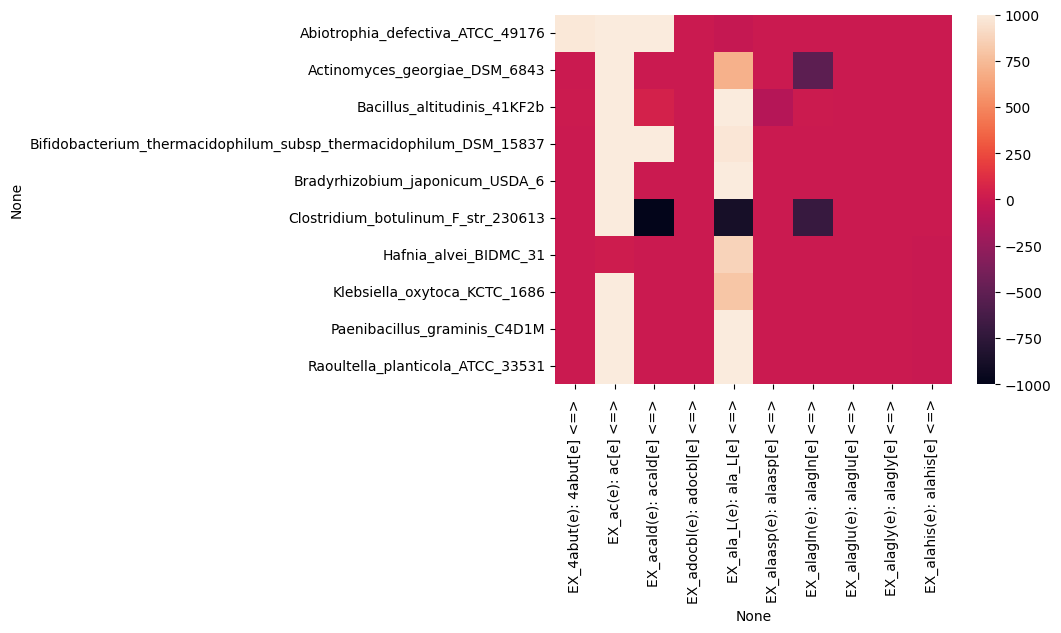

In [87]:
import seaborn as sns
df_subset = df.iloc[:, :10] # displying only the first 10 exchange reactions for clarity
sns.heatmap(df_subset)